# Ray Samplers

## Spaced Samplers

A basic sampler that spaces samples based on a predefined function.

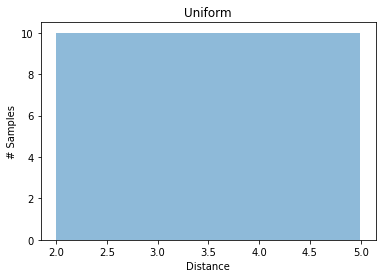

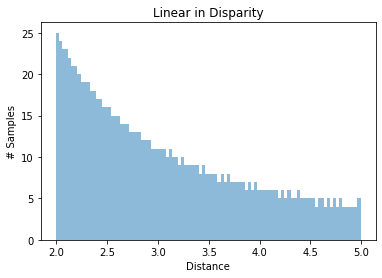

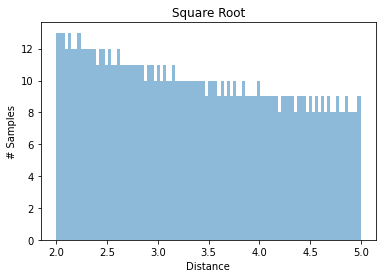

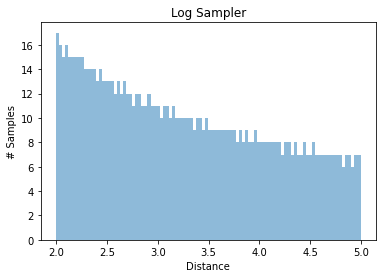

In [13]:
# COLLAPSED
import torch
from nerfactory.cameras.rays import RayBundle
from nerfactory.graphs.modules import ray_sampler
from matplotlib import pyplot as plt

num_samples = 1000
near = 2
far = 5
train_stratified = False

samplers = {
    "Uniform": ray_sampler.UniformSampler,
    "Linear in Disparity": ray_sampler.LinearDisparitySampler,
    "Square Root": ray_sampler.SqrtSampler,
    "Log Sampler": ray_sampler.LogSampler,
}

for name, Sampler in samplers.items():
    sampler = Sampler(num_samples=num_samples, train_stratified=train_stratified)

    ray_bundle = RayBundle(
        origins=torch.ones([1, 3]),
        directions=torch.ones([1, 3]),
        pixel_area=torch.ones([1, 1]),
        nears=torch.ones([1, 1]) * near,
        fars=torch.ones([1, 1]) * far,
    )

    samples = sampler.generate_ray_samples(ray_bundle)
    samples.frustums.starts.shape

    plt.hist(samples.frustums.starts[0, :, 0], alpha=0.5, bins=100)
    plt.xlabel("Distance")
    plt.ylabel("# Samples")
    plt.title(name)
    plt.show()